In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.rcParams['figure.dpi'] = 100

In [2]:
def arithmetic_geometric_mean(x, y):
    while not math.isclose(x, y):
        x_next = (x + y) * 0.5
        y_next = (x * y) ** 0.5
        x, y = x_next, y_next
    return x

In [3]:
def arithmetic_geometric_mean_opposite(M0, x):
    M = M0 or 0.01
    y = y_prev = M
    if math.log(x/M) < 0.6:
        while True:
            ya = M*2 - x
            yg = M**2 / x
            y = (ya + yg) / 2
            M = M*(M0 / arithmetic_geometric_mean(x, y))
            if math.isclose(y, y_prev): break
            y_prev = y
    else:
        f = max(1, x/M)
        while True:
            y = y * ((M/arithmetic_geometric_mean(x, y)) ** f)
            if math.isclose(y, y_prev): break
            y_prev = y
    return y

In [4]:
neutral_element = arithmetic_geometric_mean_opposite(2, 4)
print(neutral_element)

0.7030519383287448


In [5]:
def operator_1_5(x, y):
    return arithmetic_geometric_mean_opposite(
        arithmetic_geometric_mean(x, y), 
        neutral_element)

In [6]:
xs = np.arange(0, 10, 0.05)
y1s = [x+2 for x in xs]
y2s = [operator_1_5(x, 2) for x in xs]
y3s = [x*2 for x in xs]
y4s = [operator_1_5(x, x) for x in xs]
y5s = [x**2 for x in xs]

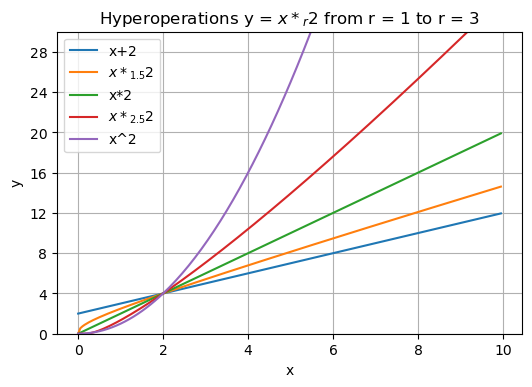

In [7]:
plt.figure(1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Hyperoperations y = $x*_{r}2$ from r = 1 to r = 3')

plt.plot(xs, y1s, label='x+2')
plt.plot(xs, y2s, label='$x*_{1.5}2$')
plt.plot(xs, y3s, label='x*2')
plt.plot(xs, y4s, label='$x*_{2.5}2$')
plt.plot(xs, y5s, label='x^2')
plt.grid()
plt.ylim([0, 30])
plt.yticks(np.arange(0, 30, 4))
plt.legend(loc='best')
plt.show()

In [8]:
# X = np.linspace(0, 2*np.pi, 10)
X = np.linspace(1, 7, 5)
X1 = np.arange(1, 7, 0.01)
Y = np.sin(X)
vandermonde_matrix = [[ operator_1_5(j, i) for i in range(len(X))] for j in X]
A_1_5 = np.linalg.solve(vandermonde_matrix, Y)
A_2 = np.linalg.solve(np.vander(X, increasing=True), Y)

In [9]:
def model_1_5(x):
    return sum([ a*operator_1_5(x, i) for i, a in enumerate(A_1_5)])

def model_2(x):
    return sum([ a*(x**i) for i, a in enumerate(A_2)])

Y_1_5 = [model_1_5(x) for x in X1]
Y_2 = [model_2(x) for x in X1]

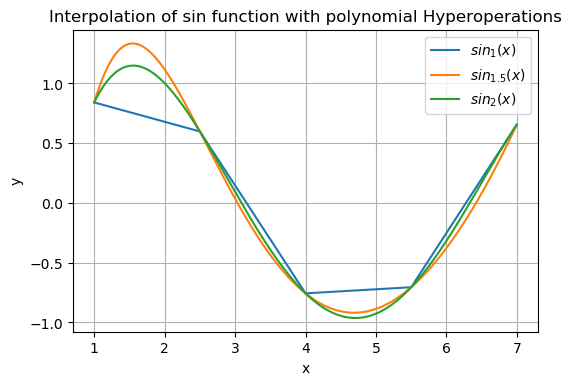

In [10]:
plt.figure(2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolation of sin function with polynomial Hyperoperations')

plt.plot(X, Y, label='$sin_{1}(x)$')
plt.plot(X1, Y_1_5, label='$sin_{1.5}(x)$')
plt.plot(X1, Y_2, label='$sin_{2}(x)$')
plt.grid()
plt.legend(loc='best')
plt.show()